In [1]:
import numpy as np
import numpy.ma as ma
#import pandas as pd
import matplotlib.pyplot as plt
import plottertools
import matplotlib.text as txt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
#from palettable.colorbrewer.qualitative import Dark2_6
plt.rcParams.update({'font.size': 18})
import glob
import sys

%matplotlib inline
def logsum(arr):
    return np.log10(np.sum(arr))

In [2]:
files=glob.glob("/data/user/lwille/FC/FC29/*")
files.sort()

FC25 = {}


for f in files:
    print f
    x = np.loadtxt(f, dtype=str, delimiter='|')
    delta = np.zeros(10000)

    for i, item in enumerate(x[51::54]):
        try:
            if float(item[12:]) > 0:
                delta[i] = float(item[12:])
        except:
            print item
    for i, item in enumerate(x[20::54]):
        try:
            if float(item[12:]) > 0:
                delta[i] += -float(item[12:])
            else:
                delta[i] = -1
        except:
            print item
    tempname = x[0]
    FC25[f[28::]] = delta


/data/user/lwille/FC/FC29/FC1.0
/data/user/lwille/FC/FC29/FC10.0
/data/user/lwille/FC/FC29/FC100.0
/data/user/lwille/FC/FC29/FC101.0
/data/user/lwille/FC/FC29/FC102.0
/data/user/lwille/FC/FC29/FC103.0
/data/user/lwille/FC/FC29/FC104.0
/data/user/lwille/FC/FC29/FC105.0
/data/user/lwille/FC/FC29/FC106.0
/data/user/lwille/FC/FC29/FC107.0
/data/user/lwille/FC/FC29/FC108.0
/data/user/lwille/FC/FC29/FC109.0
/data/user/lwille/FC/FC29/FC11.0
/data/user/lwille/FC/FC29/FC110.0
/data/user/lwille/FC/FC29/FC111.0
/data/user/lwille/FC/FC29/FC112.0
/data/user/lwille/FC/FC29/FC113.0
/data/user/lwille/FC/FC29/FC114.0
/data/user/lwille/FC/FC29/FC115.0
/data/user/lwille/FC/FC29/FC116.0
/data/user/lwille/FC/FC29/FC117.0
/data/user/lwille/FC/FC29/FC118.0
/data/user/lwille/FC/FC29/FC119.0
/data/user/lwille/FC/FC29/FC12.0
/data/user/lwille/FC/FC29/FC120.0
/data/user/lwille/FC/FC29/FC121.0
/data/user/lwille/FC/FC29/FC122.0
/data/user/lwille/FC/FC29/FC123.0
/data/user/lwille/FC/FC29/FC124.0
/data/user/lwille/F

In [2]:
files=glob.glob("/data/user/lwille/FC/FC219/*")
files.sort()

FC219 = {}


for f in files:
    print f
    x = np.loadtxt(f, dtype=str, delimiter='|')
    delta = np.zeros(10000)

    for i, item in enumerate(x[51::54]):
        try:
            if float(item[12:]) > 0:
                delta[i] = float(item[12:])
        except:
            print item
    for i, item in enumerate(x[20::54]):
        try:
            if float(item[12:]) > 0:
                delta[i] += -float(item[12:])
            else:
                delta[i] = -1
        except:
            print item
    tempname = x[0]
    FC219[f[29::]] = delta

/data/user/lwille/FC/FC219/FC1.0
/data/user/lwille/FC/FC219/FC10.0
/data/user/lwille/FC/FC219/FC11.0
/data/user/lwille/FC/FC219/FC12.0
/data/user/lwille/FC/FC219/FC13.0
/data/user/lwille/FC/FC219/FC14.0
/data/user/lwille/FC/FC219/FC15.0
/data/user/lwille/FC/FC219/FC16.0
/data/user/lwille/FC/FC219/FC17.0
/data/user/lwille/FC/FC219/FC18.0
/data/user/lwille/FC/FC219/FC19.0
/data/user/lwille/FC/FC219/FC2.0
/data/user/lwille/FC/FC219/FC20.0
/data/user/lwille/FC/FC219/FC21.0
/data/user/lwille/FC/FC219/FC22.0
/data/user/lwille/FC/FC219/FC23.0
/data/user/lwille/FC/FC219/FC24.0
/data/user/lwille/FC/FC219/FC25.0
/data/user/lwille/FC/FC219/FC26.0
/data/user/lwille/FC/FC219/FC27.0
/data/user/lwille/FC/FC219/FC28.0
/data/user/lwille/FC/FC219/FC29.0
/data/user/lwille/FC/FC219/FC3.0
/data/user/lwille/FC/FC219/FC30.0
/data/user/lwille/FC/FC219/FC31.0
/data/user/lwille/FC/FC219/FC32.0
/data/user/lwille/FC/FC219/FC33.0
/data/user/lwille/FC/FC219/FC34.0
/data/user/lwille/FC/FC219/FC35.0
/data/user/lwille

In [17]:
files=glob.glob("/data/user/lwille/FC/FC29/*")
files.sort()

FC29 = {}


for f in files:
    print f
    x = np.loadtxt(f, dtype=str, delimiter='|')
    delta = np.zeros(10000)

    for i, item in enumerate(x[51::54]):
        try:
            if float(item[12:]) > 0:
                delta[i] = float(item[12:])
        except:
            print item
    for i, item in enumerate(x[20::54]):
        try:
            if float(item[12:]) > 0:
                delta[i] += -float(item[12:])
            else:
                delta[i] = -1
        except:
            print item
    tempname = x[0]
    FC29[f[30::]] = delta

/data/user/lwille/FC/FC29/FC1.0
/data/user/lwille/FC/FC29/FC10.0


KeyboardInterrupt: 

In [12]:
files=glob.glob("/data/user/lwille/FC/219*.txt")
files.sort()

profiles = {}

for f in files:
    print f
    x = np.loadtxt(f, dtype=str, delimiter='|')
    LLH = np.zeros((2,101))
    for i, item in enumerate(x[32::21]):
        LLH[0,i] = float(item[:-8].split(' ')[2])

    for i, item in enumerate(x[33::21]):
        LLH[1,i] = float(item[12:])
    tempname = x[0]
    profiles[f[21:-8:]] = LLH

/data/user/lwille/FC/219scan.txt


In [22]:
failures = {}
for norm in FC.keys():
    fail = 0
    for i in FC[j]:
        if i == -1:
            fail += 1
    failures[norm] = fail


In [5]:
deltaLLh = np.zeros((2,200))
for j, norm in enumerate(FC25.keys()):
    bins = np.linspace(0,np.max(FC25[norm]),10000)
    entry = np.digitize(FC25[norm],bins)

    binvalue = np.zeros(10000-1)

    for i, item in enumerate(entry):
        if item == 0 or item == len(bins):
            continue
        binvalue[item-1] += 1
    for i, item in enumerate(np.cumsum(binvalue)):
        if item > 0.9*np.sum(binvalue):
            deltaLLh[0,j] = np.float(norm)
            deltaLLh[1,j] = bins[i]
            break


In [5]:
deltaLLh219 = np.zeros((2,99))
for j, norm in enumerate(FC219.keys()):
    bins = np.linspace(0,np.max(FC219[norm]),10000)
    entry = np.digitize(FC219[norm],bins)

    binvalue = np.zeros(10000-1)

    for i, item in enumerate(entry):
        if item == 0 or item == len(bins):
            continue
        binvalue[item-1] += 1
    for i, item in enumerate(np.cumsum(binvalue)):
        if item > 0.9*np.sum(binvalue):
            deltaLLh219[0,j] = np.float(norm)
            deltaLLh219[1,j] = bins[i]
            break


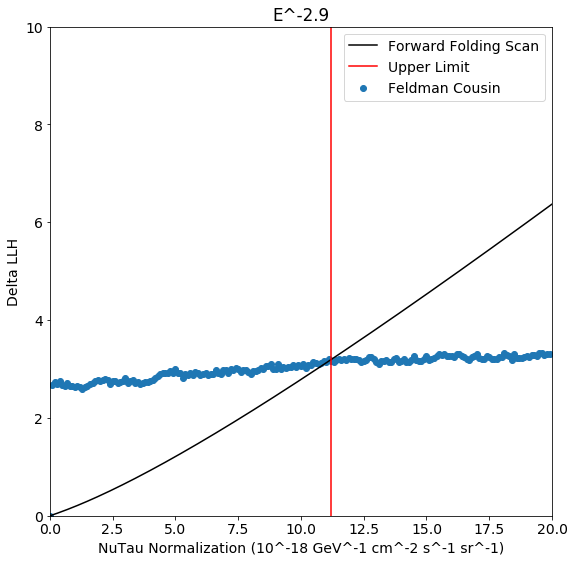

In [12]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(9,9))

plt.scatter(deltaLLh[0]/10.,deltaLLh[1],label='Feldman Cousin')
plt.plot(profiles['29'][0]/10.,profiles['29'][1]-profiles['29'][1,0],color='black', label='Forward Folding Scan')
plt.axvline(11.2,color='red',label = 'Upper Limit')
plt.legend()
plt.ylim(0,10)
plt.xlim(0,20)
plt.xlabel('NuTau Normalization (10^-18 GeV^-1 cm^-2 s^-1 sr^-1)')
plt.ylabel('Delta LLH')
plt.savefig('FCscan29.pdf')
plt.title('E^-2.9')
plt.show()

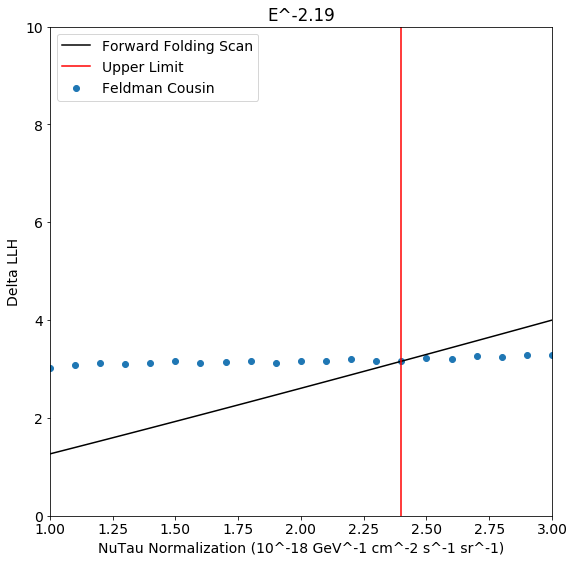

In [17]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(9,9))

plt.scatter(deltaLLh219[0]/10.,deltaLLh219[1],label='Feldman Cousin')
plt.plot(profiles['219'][0]/10.,profiles['219'][1]-profiles['219'][1,0],color='black', label='Forward Folding Scan')
plt.axvline(2.4,color='red',label = 'Upper Limit')
plt.legend()
plt.ylim(0,10)
plt.xlim(1,3)
plt.xlabel('NuTau Normalization (10^-18 GeV^-1 cm^-2 s^-1 sr^-1)')
plt.ylabel('Delta LLH')
#plt.savefig('FCscan29.pdf')
plt.title('E^-2.19')
plt.show()